# Vibrational-translational relaxation time of NO+NO
 + all temperature unit is K
 + all function output is atm*s

In [1]:
import numpy as np
import scipy.constants as const

## 1. Avaible data
### a) Millikan-White formula
Original Millikan-White formula
$$
   \begin{equation}
       [p \tau_v]_{MW} = \exp[a ( T^{-1/3} - b)-c]  
   \end{equation}
$$

In [2]:
class MillikanWhite:
    def __init__(self,a,b,c=18.42):
        self.a = a
        self.b = b
        self.c = c
    def ptau (self,T):
        return (np.exp(self.a*(np.power(T,-1.0/3.0)-self.b)-self.c),np.power(T,-1.0/3.0))

### b) Millikan-White formula with Park's high temperature correction
$$
   \begin{gather}
       [p\tau_v]_{Park} = [p \tau_v]_{MW}  + \frac{k_B T }{\sigma_v \sqrt{(8k_B T/ \pi \mu )}}\\
       \sigma_v = \sigma_v'(50,000/T)^2 , \quad \sigma_v' = 3\times 10 ^{-17} \mathrm{cm^2}
   \end{gather}
$$

In [3]:
class ParkCorrection(MillikanWhite):
    def __init__(self,a,b,c,sigma):
        MillikanWhite.__init__(self,a,b,c=18.42)
        self.sigma = sigma  #unit: cm^2
        self.sigma = self.sigma*1e-4
    def ptau (self,T):
        MW = np.exp(self.a*(np.power(T,-1.0/3.0)-self.b)-self.c)
        sigma = self.sigma*np.power(5e4/T,2.0)
        correction =  1.0/const.atm*const.k*T/sigma/np.sqrt(8*const.k*T/const.pi/(30/2*const.u))
        return (MW + correction,np.power(T,-1.0/3.0))
    

### c) Wray's fit to experimental data
    Temperature range: T=1,000~7,000K
    
$$
   \begin{gather}
       \left[\tau_s[1-\exp(-\theta/T)]T^{1/2} \right]^{-1} =  \left( \exp [-(b+c T^{-\frac{1}{3}})] + d T^{-1} \exp(-e/T)\right)\\
       \tau_s \frac{p_s}{k_B T_s} = \tau_v \frac{p}{k_B T}  \to  p \tau_v = \tau_s p_s T/T_s
   \end{gather}
$$

In [4]:
def Wray (T):
    theta = 2688.0
    a = 0.002
    b=-9.71
    c= 139.0 
    d= 1057.0
    e=1103.0
    ps=1  #atm
    Ts=273.0  #K
    Tinv3 = np.power(T,-1.0/3.0)
    pt = 1./((1-np.exp(-theta/T))*np.sqrt(T)*( np.exp(- (b+c*Tinv3))+d/T*np.exp(-e/T)))*1e-6*T/Ts*ps;  #s*atm
    return (pt,Tinv3)

### d)  Kamimoto and Matsui's experimental data
    Temperature range: T=900~2,700K
$$
   \begin{gather}
        log(p \tau_v)/log(10) = {6.1 T^{-1/3}-1.1}
   \end{gather}
$$

In [5]:
def Kamimoto(T):
    return (np.power(10.0,(6.1*np.power(T,-1.0/3.0)-1.1))*1e-6,np.power(T,-1.0/3.0))

### e)  Glänzer and Troe's experimental data
    Temperature range: T=900~2,700K.
    The relaxation time defined as the following is first measured: 
  $$
        \begin{equation}
            \frac{NO(i)_\infty - NO(i)_t}{NO(i)_\infty - NO(i)_0} = -\exp[-t/\tau (i)]
        \end{equation}
  $$
    
    The dependence of the relaxation time and mole fraction is found as the following (Test gas is composed by Ar and NO):
  $$
       \begin{equation}
           \frac{1}{\tau(i) [M]} = k_{Ar}(i)[1-X_{NO}]+k_{NO}(i)X_{NO}
        \end{equation}
  $$
    Take the similar assumptions to Landau-Teller theory (i.e. harmonic oscillator), the relaxation time is estimated as the following:
  $$ 
       \begin{gather}
           k_{1\to 0}(T) = k(1)/[1+\exp(-\theta_v/T)] \\
           p \tau_v = \frac{k_B T} {k_{1\to 0}(T) (1-\exp(-\theta_v/T) )}
       \end{gather}
  $$

In [6]:
def Glanzer():
    T = np.array([900, 1200, 1500, 1800, 2100, 2400, 2700])
    theta = 2738.874
    k1 = np.array([2.20e+11, 3.30e+11, 4.00e+11, 5.40e+11, 4.80e+11, 5.90e11, 7.90e11]) #cm^3/mol
    k1 = k1*1.0e-6/const.N_A   #cm^3
    pt = const.k*T/(k1*(1.0-np.exp(-2.0*theta/T)))/const.atm
    return (pt,np.power(T,-1.0/3.0))


### f)  Ibraguimova and Shatalov's summarization of previous experimental data
    Temperature range: T=730~6,800K
$$
   \begin{gather}
        p \tau_v = 7.9\times 10^{-8} \exp(14.05 T^{-1/3})
   \end{gather}
$$

In [7]:
def Ibraguimova(T):
    return (7.9e-8*np.exp(14.05*np.power(T,-1.0/3.0)), np.power(T,-1.0/3.0))

## 2. Comparison

In [8]:
Result = [None]*6
T1 = np.arange(1e3,2e4,100.0)
MWmodel = MillikanWhite(a=49.5,b=0.042,c=18.42)
Result[0] = MWmodel.ptau(T1)
Parkmodel = ParkCorrection(a=49.5,b=0.042,c=18.42,sigma=3.0e-17)
Result[1] = Parkmodel.ptau(T1)
T2 = np.arange(1e3,7e3,100.0)
Result[2] = Wray(T2)
T3 = np.arange(900.0,2700.0,100.0)
Result[3]= Kamimoto(T3)
Result[4] = Ibraguimova(T3)
Result[5] = Glanzer()
legend = ['MW','MW with Park\'s correction','Wray','Kamimoto et al.','Ibraguimova et al.','Glanzer et al.']


<IPython.core.display.Javascript object>


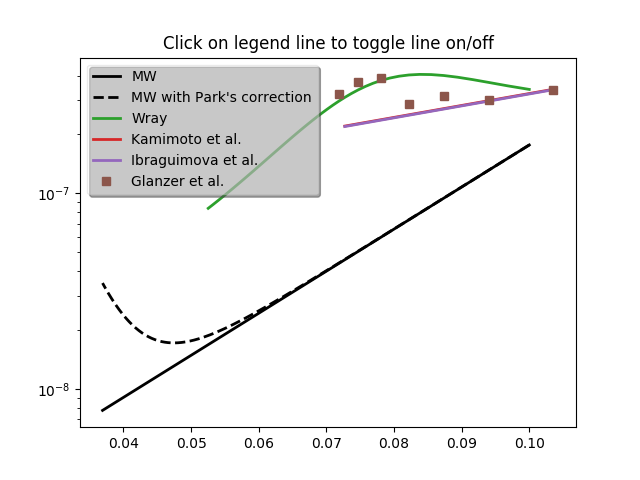

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.set_title('Click on legend line to toggle line on/off')
lines = list()
for i,r in enumerate(Result):
    linex, = ax.plot(r[1], r[0], lw=2, label=legend[i])
    lines.append(linex)

lines[1].set_linestyle('--')
lines[-1].set_linestyle('None')
lines[-1].set_marker("s")
lines[0].set_color('k')
lines[1].set_color('k')


leg = ax.legend(loc='upper left', fancybox=True, shadow=True)
leg.get_frame().set_alpha(0.4)
lined = dict()
for legline, origline in zip(leg.get_lines(), lines):
    legline.set_picker(5)  # 5 pts tolerance
    lined[legline] = origline


def onpick(event):
    # on the pick event, find the orig line corresponding to the
    # legend proxy line, and toggle the visibility
    legline = event.artist
    origline = lined[legline]
    vis = not origline.get_visible()
    origline.set_visible(vis)
    # Change the alpha on the line in the legend so we can see what lines
    # have been toggled
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    fig.canvas.draw()

fig.canvas.mpl_connect('pick_event', onpick)

plt.show()